In [1]:
import json
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
from espncricinfo.match import Match

In [2]:
def get_player_table(player_id, table_type='batting'):
    url = f"https://stats.espncricinfo.com/ci/engine/player/{player_id}.html?class=1;template=results;type={table_type};view=innings"
    r = requests.get(url)
    if r.status_code == 404:
        raise PlayerNotFoundError
    else:
        soup = BeautifulSoup(r.text, 'html.parser')
        tables = soup.findAll('table', class_='engineTable')
        table = pd.read_html(str(tables[3]))[0]
        return table


In [4]:
get_player_table(4625, 'fielding')

,Dis,Ct,St,Ct Wk,Ct Fi,Inns,Unnamed: 6,Opposition,Ground,Start Date,Unnamed: 10
0,2,2,0,0,2,2,NaN,v England,Melbourne,15 Mar 1877,Test # 1
1,0,0,0,0,0,4,NaN,v England,Melbourne,15 Mar 1877,Test # 1


In [99]:
batting['Runs'] = batting['Runs'].replace({'DNB':np.nan, 'sub':np.nan})

In [101]:
runs = batting['Runs'].str.replace('*', '').astype(float)

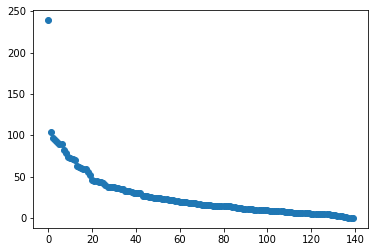

In [98]:
# s = np.random.exponential(61, 140)
# plt.scatter(range(len(s)), np.sort(s)[::-1]/np.sort(s)[::-1].max()*runs.max() )
s = np.random.power(61, 140)
plt.scatter(range(len(s)), (1- np.sort(s))/(1- np.sort(s)).max()*runs.max() )

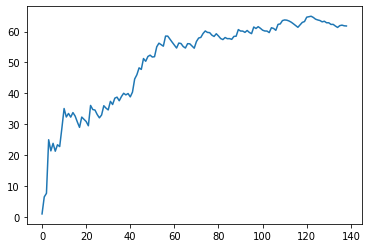

In [110]:
runs = 0
outs = 0
running_average = []
for i in batting['Runs'].dropna():
    if i != np.nan:
        if '*' not in i:
            runs+=float(i)
            outs+=1
            running_average.append(runs/outs)
        else:
            i_s = i.replace('*', '')
            runs+=float(i_s)
            running_average.append(runs/outs)
plt.plot(running_average)